# Sampling and Hypothesis Testing

In [583]:
#Libraries
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn import preprocessing
from scipy.stats import ttest_1samp
from sklearn.preprocessing import MinMaxScaler
import os

# Visa Shopping

Visa shopping: It is where someone would apply in a specific consulate in order to have higher odds of getting the visa or getting a higher tier visa in general. The idea itself seemed to have a lot of rumours around it and the only way to consider it a myth/reality is by doing proper analysis over real data. Luckily, the data is here.

# Your job is to appropriately sample and run hypothesis testing to prove/disprove whether Visa-shopping is real. 

We are trying to figure out the best consulates to apply for to have the highest odds for receiving a uniform visa in general, or a multiple entry visa (MEV) in particular.

In [584]:
df = pd.read_csv("2018-data-for-consulates.csv")
df.head()

,Schengen State,Country where consulate is located,Consulate,Airport transit visas (ATVs) applied for,ATVs issued (including multiple),Multiple ATVs issued,ATVs not issued,Not issued rate for ATVs,Uniform visas applied for,Total uniform visas issued (including MEV),Multiple entry uniform visas (MEVs) issued,Share of MEVs on total number of uniform visas issued,Total LTVs issued,Uniform visas not issued,Not issued rate for uniform visas,Total ATVs and uniform visas applied for,"Total ATVs and uniform visas issued (including multiple ATVs, MEVs and LTVs)",Total ATVs and uniform visas not issued,Not issued rate for ATVs and uniform visas
0,Austria,ALBANIA,TIRANA,NaN,NaN,NaN,NaN,NaN,62,32,10,31.3%,21,9,14.5%,62,53,9,14.5%
1,Austria,ALGERIA,ALGIERS,NaN,NaN,NaN,NaN,NaN,2481,1658,1461,88.1%,1,822,33.1%,"2,481","1,659",822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,NaN,NaN,NaN,NaN,NaN,16,16,16,100.0%,NaN,NaN,NaN,16,16,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,NaN,NaN,NaN,NaN,NaN,2776,2653,989,37.3%,1,122,4.4%,"2,776","2,654",122,4.4%
4,Austria,AZERBAIJAN,BAKU,1,1,1,NaN,NaN,1976,1895,1769,93.4%,2,79,4.0%,"1,977","1,898",79,4.0%


# Data Cleaning: 


It is a good technique to strip column names of trailing white spaces and "\n" characters. Do that in the cell provided below.
- Rename columns with white spaces for e.g. "Schengen State': 'sch_state'"
- Look into df.strip()

In [585]:
#removing trailing and leading spaces from column names
df.columns = df.columns.str.strip()
df.head()

,Schengen State,Country where consulate is located,Consulate,Airport transit visas (ATVs) applied for,ATVs issued (including multiple),Multiple ATVs issued,ATVs not issued,Not issued rate for ATVs,Uniform visas applied for,Total uniform visas issued (including MEV),Multiple entry uniform visas (MEVs) issued,Share of MEVs on total number of uniform visas issued,Total LTVs issued,Uniform visas not issued,Not issued rate for uniform visas,Total ATVs and uniform visas applied for,"Total ATVs and uniform visas issued (including multiple ATVs, MEVs and LTVs)",Total ATVs and uniform visas not issued,Not issued rate for ATVs and uniform visas
0,Austria,ALBANIA,TIRANA,NaN,NaN,NaN,NaN,NaN,62,32,10,31.3%,21,9,14.5%,62,53,9,14.5%
1,Austria,ALGERIA,ALGIERS,NaN,NaN,NaN,NaN,NaN,2481,1658,1461,88.1%,1,822,33.1%,"2,481","1,659",822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,NaN,NaN,NaN,NaN,NaN,16,16,16,100.0%,NaN,NaN,NaN,16,16,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,NaN,NaN,NaN,NaN,NaN,2776,2653,989,37.3%,1,122,4.4%,"2,776","2,654",122,4.4%
4,Austria,AZERBAIJAN,BAKU,1,1,1,NaN,NaN,1976,1895,1769,93.4%,2,79,4.0%,"1,977","1,898",79,4.0%


In [586]:
#Replacing white spaces in the middle with underscores
df.columns = df.columns.str.replace(r"\s","_")
df.head()

,Schengen_State,Country_where_consulate_is_located,Consulate,Airport_transit_visas_(ATVs)_applied_for,ATVs_issued_(including_multiple),Multiple_ATVs_issued,ATVs_not_issued,Not_issued_rate_for_ATVs,Uniform_visas_applied_for,Total__uniform_visas_issued_(including_MEV),Multiple_entry_uniform_visas_(MEVs)_issued,Share_of_MEVs_on_total_number_of_uniform_visas_issued,Total_LTVs_issued,Uniform_visas_not_issued,Not_issued_rate_for_uniform_visas,Total_ATVs_and_uniform_visas_applied_for,"Total_ATVs_and_uniform_visas_issued__(including_multiple_ATVs,_MEVs_and_LTVs)",Total_ATVs_and_uniform_visas_not_issued,Not_issued_rate_for_ATVs_and_uniform_visas
0,Austria,ALBANIA,TIRANA,NaN,NaN,NaN,NaN,NaN,62,32,10,31.3%,21,9,14.5%,62,53,9,14.5%
1,Austria,ALGERIA,ALGIERS,NaN,NaN,NaN,NaN,NaN,2481,1658,1461,88.1%,1,822,33.1%,"2,481","1,659",822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,NaN,NaN,NaN,NaN,NaN,16,16,16,100.0%,NaN,NaN,NaN,16,16,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,NaN,NaN,NaN,NaN,NaN,2776,2653,989,37.3%,1,122,4.4%,"2,776","2,654",122,4.4%
4,Austria,AZERBAIJAN,BAKU,1,1,1,NaN,NaN,1976,1895,1769,93.4%,2,79,4.0%,"1,977","1,898",79,4.0%


We are not interested in Airport Transit Visas (ATV). Drop all the columns involving ATVs for e.g. Multiple ATVs issued, ATVs not issued,

In [587]:
#Finding columns which do not contain references to ATV 
cols_to_drop=~df.columns.str.contains('ATV', case=True, regex=True)
cols_to_drop
df=df.loc[:, cols_to_drop]
df.head()

,Schengen_State,Country_where_consulate_is_located,Consulate,Uniform_visas_applied_for,Total__uniform_visas_issued_(including_MEV),Multiple_entry_uniform_visas_(MEVs)_issued,Share_of_MEVs_on_total_number_of_uniform_visas_issued,Total_LTVs_issued,Uniform_visas_not_issued,Not_issued_rate_for_uniform_visas
0,Austria,ALBANIA,TIRANA,62,32,10,31.3%,21,9,14.5%
1,Austria,ALGERIA,ALGIERS,2481,1658,1461,88.1%,1,822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,16,16,16,100.0%,NaN,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,2776,2653,989,37.3%,1,122,4.4%
4,Austria,AZERBAIJAN,BAKU,1976,1895,1769,93.4%,2,79,4.0%


# Missing Values

- Drop the rows where Schengen State is missing.
- Replace other missing values with zero.
- Print the summary for missing values after cleaning.

In [588]:
df.isnull().sum()

Schengen_State                                            13
Country_where_consulate_is_located                        13
Consulate                                                 10
Uniform_visas_applied_for                                 14
Total__uniform_visas_issued_(including_MEV)               54
Multiple_entry_uniform_visas_(MEVs)_issued               147
Share_of_MEVs_on_total_number_of_uniform_visas_issued    150
Total_LTVs_issued                                        846
Uniform_visas_not_issued                                 361
Not_issued_rate_for_uniform_visas                        363
dtype: int64

In [589]:
# Dropping rows where Schengen State is missing.
df = df.dropna(how='any', subset=['Schengen_State'])
df.isnull().sum()

Schengen_State                                             0
Country_where_consulate_is_located                         0
Consulate                                                  0
Uniform_visas_applied_for                                  4
Total__uniform_visas_issued_(including_MEV)               44
Multiple_entry_uniform_visas_(MEVs)_issued               137
Share_of_MEVs_on_total_number_of_uniform_visas_issued    139
Total_LTVs_issued                                        836
Uniform_visas_not_issued                                 351
Not_issued_rate_for_uniform_visas                        352
dtype: int64

In [590]:
#Replacing other missing values with zero.
for col in df:
    if(df[col].isnull().values.any()):
        df[col]=df[col].replace(to_replace=np.nan, value='0') 

In [591]:
#Print Summary again
df.isnull().sum() 

Schengen_State                                           0
Country_where_consulate_is_located                       0
Consulate                                                0
Uniform_visas_applied_for                                0
Total__uniform_visas_issued_(including_MEV)              0
Multiple_entry_uniform_visas_(MEVs)_issued               0
Share_of_MEVs_on_total_number_of_uniform_visas_issued    0
Total_LTVs_issued                                        0
Uniform_visas_not_issued                                 0
Not_issued_rate_for_uniform_visas                        0
dtype: int64

- Add columns of "decisions" and "rejection_rate"
- Decisions is total number of decisions taken - sum of visas issued, LTV's issued, Rejected
- Rejection rate is what percentage of *decisions* are rejected

In [592]:
#Checking data types to see if we could add values
df.dtypes

Schengen_State                                           object
Country_where_consulate_is_located                       object
Consulate                                                object
Uniform_visas_applied_for                                object
Total__uniform_visas_issued_(including_MEV)              object
Multiple_entry_uniform_visas_(MEVs)_issued               object
Share_of_MEVs_on_total_number_of_uniform_visas_issued    object
Total_LTVs_issued                                        object
Uniform_visas_not_issued                                 object
Not_issued_rate_for_uniform_visas                        object
dtype: object

In [593]:
#Converting numerical columns stored as string to ints:
col=list(df)
col.remove("Schengen_State")
col.remove("Country_where_consulate_is_located")
col.remove("Consulate")

#Will deal with percentages separately later
df["Share_of_MEVs_on_total_number_of_uniform_visas_issued"]=df["Share_of_MEVs_on_total_number_of_uniform_visas_issued"].str.replace(r"%","")
df["Not_issued_rate_for_uniform_visas"]=df["Not_issued_rate_for_uniform_visas"].str.replace(r"%","")

#intentionally changing some to floats and not ints for later calculations
df.head()
for i in col:
    df[i]=df[i].str.replace(r",","")
    df[i]=df[i].astype('float64')
df.dtypes

Schengen_State                                            object
Country_where_consulate_is_located                        object
Consulate                                                 object
Uniform_visas_applied_for                                float64
Total__uniform_visas_issued_(including_MEV)              float64
Multiple_entry_uniform_visas_(MEVs)_issued               float64
Share_of_MEVs_on_total_number_of_uniform_visas_issued    float64
Total_LTVs_issued                                        float64
Uniform_visas_not_issued                                 float64
Not_issued_rate_for_uniform_visas                        float64
dtype: object

In [594]:
# Capitalizing Schengen State names for consistency
df["Schengen_State"]=df["Schengen_State"].str.upper()
df.head()

,Schengen_State,Country_where_consulate_is_located,Consulate,Uniform_visas_applied_for,Total__uniform_visas_issued_(including_MEV),Multiple_entry_uniform_visas_(MEVs)_issued,Share_of_MEVs_on_total_number_of_uniform_visas_issued,Total_LTVs_issued,Uniform_visas_not_issued,Not_issued_rate_for_uniform_visas
0,AUSTRIA,ALBANIA,TIRANA,62.0,32.0,10.0,31.3,21.0,9.0,14.5
1,AUSTRIA,ALGERIA,ALGIERS,2481.0,1658.0,1461.0,88.1,1.0,822.0,33.1
2,AUSTRIA,ARGENTINA,BUENOS AIRES,16.0,16.0,16.0,100.0,0.0,0.0,0.0
3,AUSTRIA,AUSTRALIA,CANBERRA,2776.0,2653.0,989.0,37.3,1.0,122.0,4.4
4,AUSTRIA,AZERBAIJAN,BAKU,1976.0,1895.0,1769.0,93.4,2.0,79.0,4.0


In [595]:
#Ignoring columns where sum of MEVs exceeds sum of all uniform visas
df=df[df["Multiple_entry_uniform_visas_(MEVs)_issued"]<=df["Total__uniform_visas_issued_(including_MEV)"]]

In [596]:
# Assuming no LTV was rejected and the discrepancy in visas applied for and those that recieved decisions comes due to
# pending decisions 
df["decisions"]=df[["Total__uniform_visas_issued_(including_MEV)","Total_LTVs_issued", "Uniform_visas_not_issued"]].sum(axis=1)
df.head()

,Schengen_State,Country_where_consulate_is_located,Consulate,Uniform_visas_applied_for,Total__uniform_visas_issued_(including_MEV),Multiple_entry_uniform_visas_(MEVs)_issued,Share_of_MEVs_on_total_number_of_uniform_visas_issued,Total_LTVs_issued,Uniform_visas_not_issued,Not_issued_rate_for_uniform_visas,decisions
0,AUSTRIA,ALBANIA,TIRANA,62.0,32.0,10.0,31.3,21.0,9.0,14.5,62.0
1,AUSTRIA,ALGERIA,ALGIERS,2481.0,1658.0,1461.0,88.1,1.0,822.0,33.1,2481.0
2,AUSTRIA,ARGENTINA,BUENOS AIRES,16.0,16.0,16.0,100.0,0.0,0.0,0.0,16.0
3,AUSTRIA,AUSTRALIA,CANBERRA,2776.0,2653.0,989.0,37.3,1.0,122.0,4.4,2776.0
4,AUSTRIA,AZERBAIJAN,BAKU,1976.0,1895.0,1769.0,93.4,2.0,79.0,4.0,1976.0


In [597]:
#Ignoring columns where the sum of uniform visa issued and rejected exceeds number uniform visas applied for assuming even
#visa shoppers apply for the visas they are issued
x=df[["Total__uniform_visas_issued_(including_MEV)", "Uniform_visas_not_issued"]].sum(axis=1)
df=df[x<=df["Uniform_visas_applied_for"]]
df.head()

,Schengen_State,Country_where_consulate_is_located,Consulate,Uniform_visas_applied_for,Total__uniform_visas_issued_(including_MEV),Multiple_entry_uniform_visas_(MEVs)_issued,Share_of_MEVs_on_total_number_of_uniform_visas_issued,Total_LTVs_issued,Uniform_visas_not_issued,Not_issued_rate_for_uniform_visas,decisions
0,AUSTRIA,ALBANIA,TIRANA,62.0,32.0,10.0,31.3,21.0,9.0,14.5,62.0
1,AUSTRIA,ALGERIA,ALGIERS,2481.0,1658.0,1461.0,88.1,1.0,822.0,33.1,2481.0
2,AUSTRIA,ARGENTINA,BUENOS AIRES,16.0,16.0,16.0,100.0,0.0,0.0,0.0,16.0
3,AUSTRIA,AUSTRALIA,CANBERRA,2776.0,2653.0,989.0,37.3,1.0,122.0,4.4,2776.0
4,AUSTRIA,AZERBAIJAN,BAKU,1976.0,1895.0,1769.0,93.4,2.0,79.0,4.0,1976.0


In [598]:
#Rejection rate is what percentage of decisions are rejected
df["rejection_rate"]=df["Uniform_visas_not_issued"].divide(df["decisions"])*100
df.head()

,Schengen_State,Country_where_consulate_is_located,Consulate,Uniform_visas_applied_for,Total__uniform_visas_issued_(including_MEV),Multiple_entry_uniform_visas_(MEVs)_issued,Share_of_MEVs_on_total_number_of_uniform_visas_issued,Total_LTVs_issued,Uniform_visas_not_issued,Not_issued_rate_for_uniform_visas,decisions,rejection_rate
0,AUSTRIA,ALBANIA,TIRANA,62.0,32.0,10.0,31.3,21.0,9.0,14.5,62.0,14.516129
1,AUSTRIA,ALGERIA,ALGIERS,2481.0,1658.0,1461.0,88.1,1.0,822.0,33.1,2481.0,33.131802
2,AUSTRIA,ARGENTINA,BUENOS AIRES,16.0,16.0,16.0,100.0,0.0,0.0,0.0,16.0,0.000000
3,AUSTRIA,AUSTRALIA,CANBERRA,2776.0,2653.0,989.0,37.3,1.0,122.0,4.4,2776.0,4.394813
4,AUSTRIA,AZERBAIJAN,BAKU,1976.0,1895.0,1769.0,93.4,2.0,79.0,4.0,1976.0,3.997976


# Hypothesis Testing

- We will be picking three countries.
- The three countries are Egypt, India and Japan.
- You need to test whether in there is a better _chance_ of getting a visa if you apply to a particukar consulate within that country or is it by chance.
- Add subheadings for each country

In order to answer this question correctly, we need to define the population and the sample we will use:
1. Population: Total number of applicants/rejects in all the country.
2. Sample: Total number of applicants/rejects in all the targeted consulates.
The null hypothesis, which is a prediction that there is no significant difference between a specific consulate over all other consulates and that these numbers could have happened out naturally due to fluctations in application qualities received.
In order to proceed with this, we need to make a rather **BIG** assumption, that all applications to all consulates have the same *average* quality or that they came from the same pool/population.




*Does this assumption make sense?*

_Write why or why not?_

We have to make this assumption as firstly, we do not have the applicant data or the application quality data to consider these as deciding factors. Secondly, even if we did have such data, we would want to work with applications of similar quality and from the same populations because only then could we attribute the potential difference in chances of getting a visa to the choice of consulate which is our goal here. 

#  We can conduct this using univariate T-test.
You will use the scipy package.
This links will help you get started:
    - https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
    
    
You need to calculate the test statistic and choose an appropriate p-value. Mention why you think this is an appropriate p-value. Once you have the test statistic, you need to sample and test your hypothesis.
    

The significance level for our p-values will be 5% as this is the most common level of significance used. We don't use a lower significance level because our results aren't pressing enough to ensure quality with a significance level of say 0.001. But since, we want to conduct a two tailed test and look for differences significantly greater or lesser than our test statistic, we will use the bound 0.05/2 instead of 0.05. Hence if our p-value < 2.5% we will reject our null model otherwise we won't.

For each country:
   - Plot a piechart showing the consulates with the highest number of decisions.
   - You will be running your hypothesis tests w.r.t three attributes
       - Rejection rate (if you have a weak visa application)
       - Multi-Entry Visa Share (if you have a strong visa application)
       - Weighted Score: You are required to calculate a normalized engineered feature
           - (1-rejection_rate) * mevs_share
           - Normalize this score
        

You are required to submit an analysis of *EACH* country why you think your hypothesis were rejected/accepted. You can include geo-political factors in your report as well.

In [599]:
# Adding weighted score column
df["Weighted_Score"]=(1-df["rejection_rate"]/100).multiply(df["Share_of_MEVs_on_total_number_of_uniform_visas_issued"])/100
#Normalizing
print("Mean before normalization:", df["Weighted_Score"].mean())
min_score=df["Weighted_Score"].min()
max_score=df["Weighted_Score"].max() 
print("min", min_score, "Max", max_score)
df["Weighted_Score"]=(df["Weighted_Score"] - min_score)/(max_score- min_score)
print("Mean after normalization:", df["Weighted_Score"].mean())
#was already normalized

Mean before normalization: 0.4352570576441026
min 0.0 Max 1.0
Mean after normalization: 0.4352570576441026


#  Egypt

(-1.1097347720285318,
 1.1004635605948545,
 -1.1065244544058936,
 1.1104819724579527)

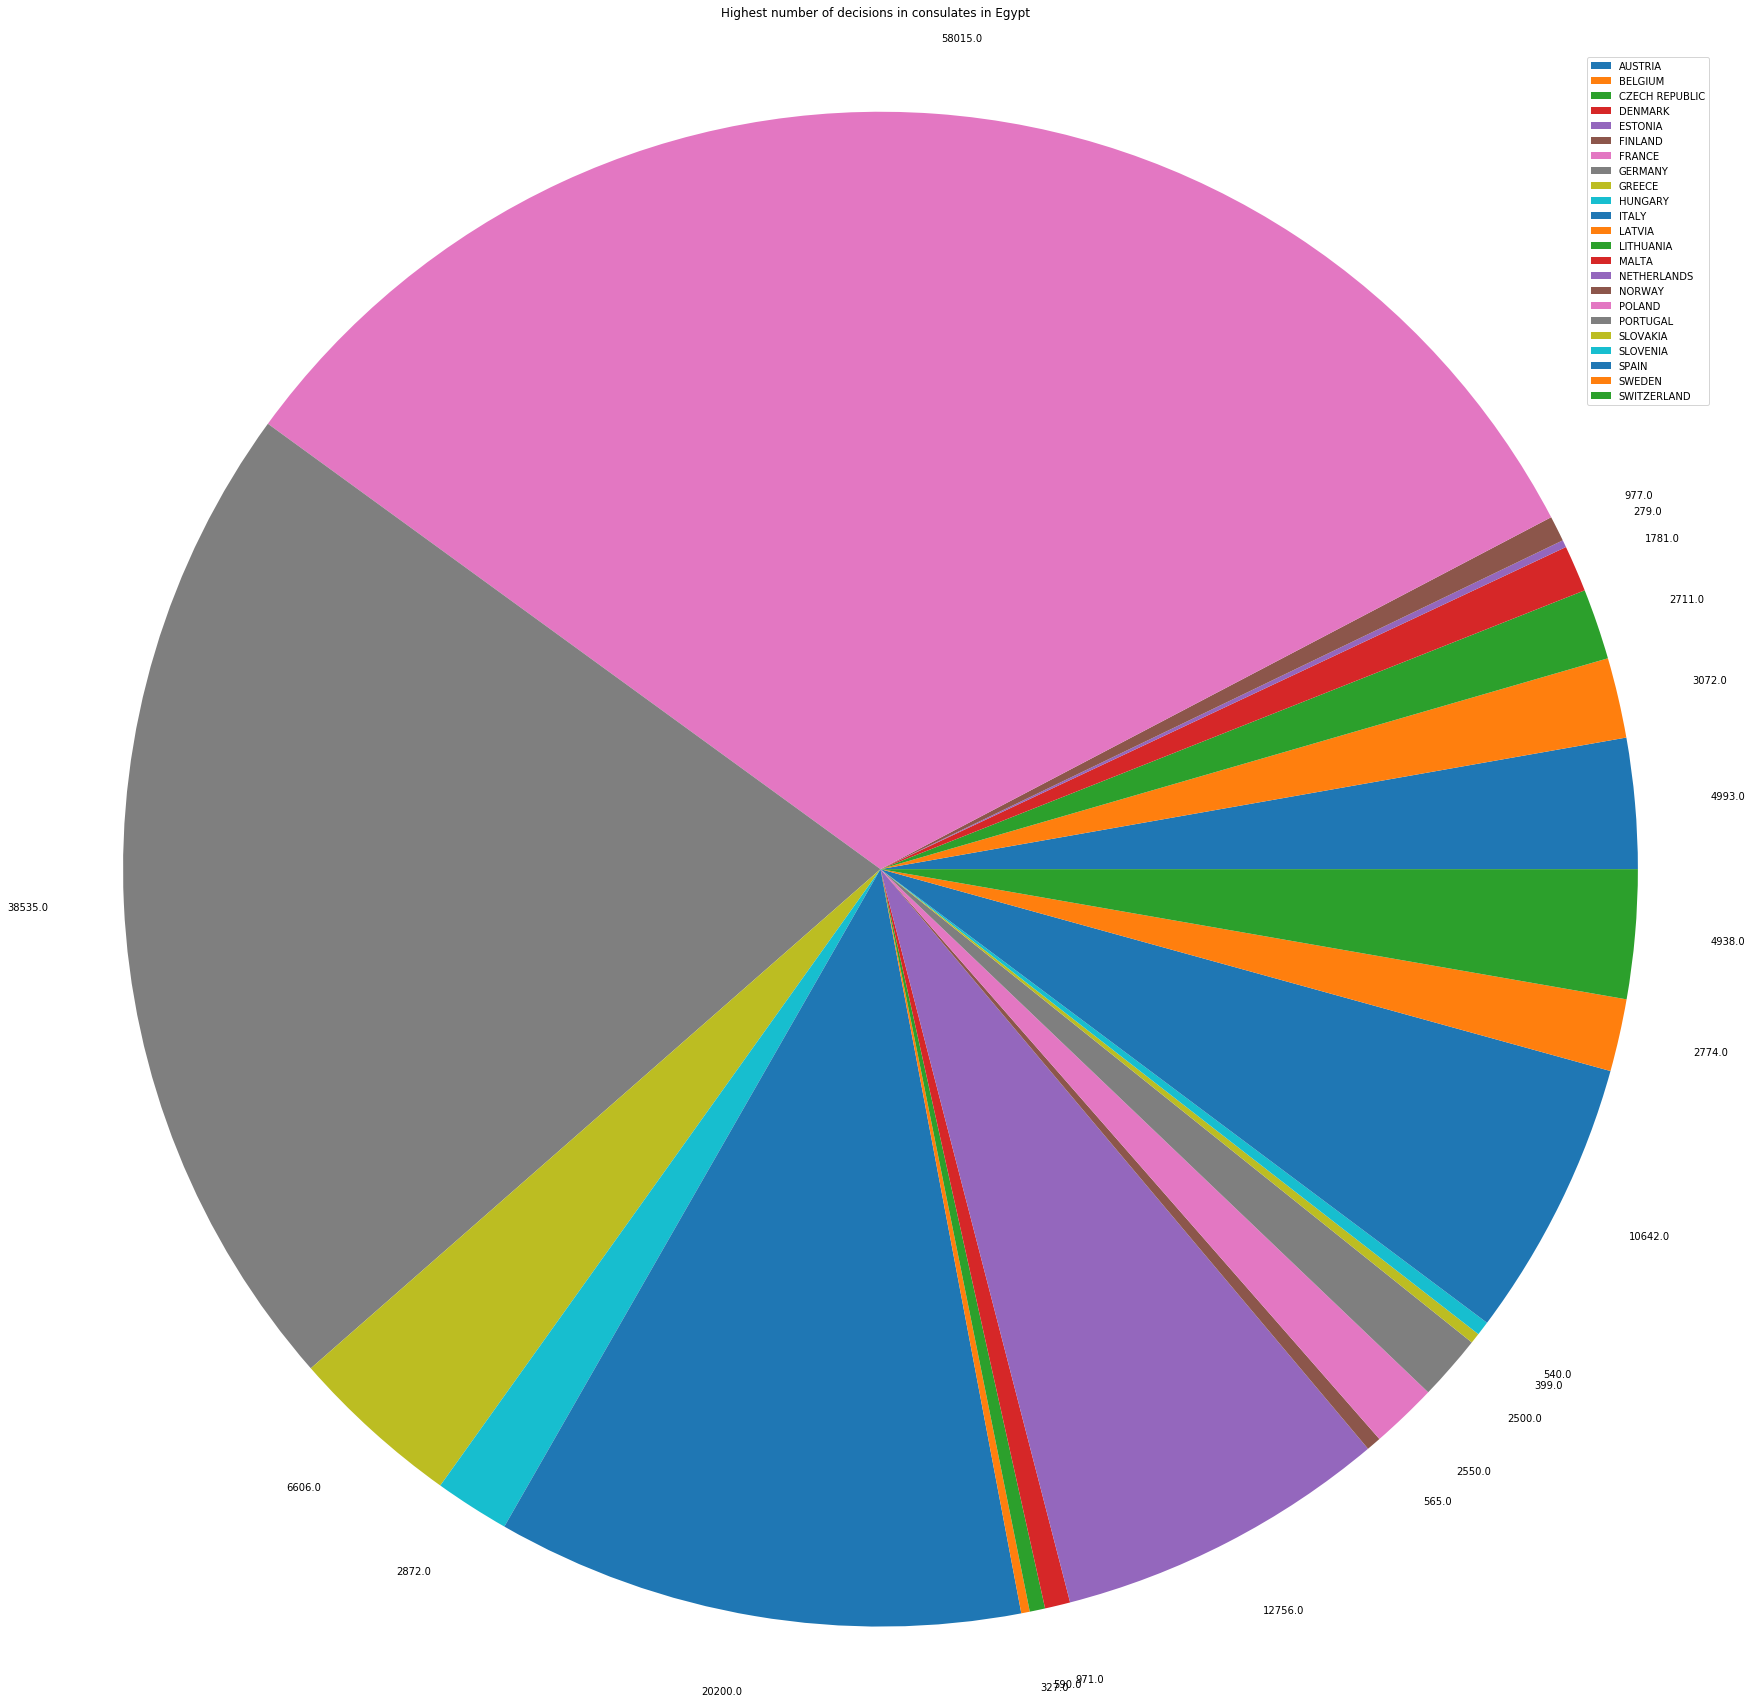

In [600]:
#Pie Chart
pie1=df[df["Country_where_consulate_is_located"]=="EGYPT"].groupby(["Schengen_State"], sort=True)['decisions'].max() #.loc[df[df["Country_where_consulate_is_located"]=="EGYPT"]['decisions'].idxmax()]
p=pie1.to_frame()
p.plot(kind="pie", y="decisions", figsize=(30, 30), labels=p["decisions"])
plt.title("Highest number of decisions in consulates in Egypt \n\n")
plt.legend(labels=p.index, loc='best')
plt.ylabel("")
plt.axis("equal")


In [601]:
df[df["Country_where_consulate_is_located"]=="EGYPT"]

,Schengen_State,Country_where_consulate_is_located,Consulate,Uniform_visas_applied_for,Total__uniform_visas_issued_(including_MEV),Multiple_entry_uniform_visas_(MEVs)_issued,Share_of_MEVs_on_total_number_of_uniform_visas_issued,Total_LTVs_issued,Uniform_visas_not_issued,Not_issued_rate_for_uniform_visas,decisions,rejection_rate,Weighted_Score
16,AUSTRIA,EGYPT,CAIRO,4993.0,4132.0,2872.0,69.5,39.0,822.0,16.5,4993.0,16.463048,0.580582
85,BELGIUM,EGYPT,CAIRO,3250.0,1946.0,464.0,23.8,15.0,1111.0,34.2,3072.0,36.165365,0.151926
170,CZECH REPUBLIC,EGYPT,CAIRO,2713.0,2015.0,433.0,21.5,3.0,693.0,25.5,2711.0,25.562523,0.160041
243,DENMARK,EGYPT,CAIRO,1790.0,1542.0,763.0,49.5,1.0,238.0,13.3,1781.0,13.363279,0.428852
295,ESTONIA,EGYPT,CAIRO,279.0,198.0,68.0,34.3,7.0,74.0,26.5,279.0,26.523297,0.252025
321,FINLAND,EGYPT,CAIRO,985.0,846.0,291.0,34.4,0.0,131.0,13.3,977.0,13.408393,0.297875
426,FRANCE,EGYPT,CAIRO,60165.0,45733.0,13514.0,29.5,341.0,11941.0,19.8,58015.0,20.582608,0.234281
587,GERMANY,EGYPT,CAIRO,38535.0,32848.0,26496.0,80.7,315.0,5372.0,13.9,38535.0,13.940574,0.694500
738,GREECE,EGYPT,ALEXANDRIA,3210.0,2873.0,1633.0,56.8,0.0,337.0,10.5,3210.0,10.498442,0.508369
739,GREECE,EGYPT,CAIRO,6606.0,5443.0,1502.0,27.6,106.0,1057.0,16.0,6606.0,16.000606,0.231838


In [602]:
## Testing consulates in Egypt based on rejection rates
rejection_rate_egypt=df[df["Country_where_consulate_is_located"]=="EGYPT"]["Uniform_visas_not_issued"].sum()/df[df["Country_where_consulate_is_located"]=="EGYPT"]['decisions'].sum()
print("Mean rejection rate: ", rejection_rate_egypt)
for index, row in df[df["Country_where_consulate_is_located"]=="EGYPT"].iterrows():
    print("\n")
    no_of_ones=row["Uniform_visas_not_issued"]
    no_of_zeroes=row["decisions"]-row["Uniform_visas_not_issued"]
    arr=np.zeros(int(row["decisions"]))
    for i in range(int(no_of_ones)):
        arr[i]=1
    tset, pval = ttest_1samp(arr, rejection_rate_egypt)
    print('p-value',pval)
    if pval < 0.025:    # alpha value is 0.025 or 2.5%
        print("We are rejecting null hypothesis for the consulate in", row["Consulate"], "of the state", row["Schengen_State"])
    else:
        print("We are accepting null hypothesis for the consulate in", row["Consulate"], "of the state", row["Schengen_State"])

Mean rejection rate:  0.2031253350487831


p-value 2.591698059521639e-13
We are rejecting null hypothesis for the consulate in CAIRO of the state AUSTRIA


p-value 5.667215810243747e-71
We are rejecting null hypothesis for the consulate in CAIRO of the state BELGIUM


p-value 4.3128355833747246e-10
We are rejecting null hypothesis for the consulate in CAIRO of the state CZECH REPUBLIC


p-value 1.4938844955839496e-17
We are rejecting null hypothesis for the consulate in CAIRO of the state DENMARK


p-value 0.019692531592620115
We are rejecting null hypothesis for the consulate in CAIRO of the state ESTONIA


p-value 3.7305863846804097e-10
We are rejecting null hypothesis for the consulate in CAIRO of the state FINLAND


p-value 0.10763325747585313
We are accepting null hypothesis for the consulate in CAIRO of the state FRANCE


p-value 7.173557290012167e-281
We are rejecting null hypothesis for the consulate in CAIRO of the state GERMANY


p-value 4.6095580193411255e-70
We are rejectin

In [603]:
# Our results show that only the French, Latvian and Slovenian consulates based in Cairo pass the null hypothesis. 
# Upon deeper study it can be seen that these three have rejection rates 0.2058, 0.2263 and 0.2333 respectively which are
# near enough to the overall rejection rate i.e. 0.2031 for us to argue that the variations are due to chance. One may argue
# that the Spanish consulate with a rejection rate of 0.1830 should also pass the test but this can be explained by the
# fact that the Spanish consulate has a large amount of applications which lowers the chance of error or variation in the 
# its rejection rate approaching the population rejection rate.

In [604]:
## Testing consulates in Egypt based on MEV share
MEV_egypt=df[df["Country_where_consulate_is_located"]=="EGYPT"]["Multiple_entry_uniform_visas_(MEVs)_issued"].sum()/df[df["Country_where_consulate_is_located"]=="EGYPT"]['Total__uniform_visas_issued_(including_MEV)'].sum()
print("Mean MEV share: ", MEV_egypt)
for index, row in df[df["Country_where_consulate_is_located"]=="EGYPT"].iterrows():
    print("\n")
    no_of_ones=row["Multiple_entry_uniform_visas_(MEVs)_issued"]
    arr=np.zeros(int(row['Total__uniform_visas_issued_(including_MEV)']))
    for i in range(int(no_of_ones)):
        arr[i]=1
    tset, pval = ttest_1samp(arr, MEV_egypt)
    print('p-value',pval)
    if pval < 0.025:    # alpha value is 0.025 or 2.5%
        print("We are rejecting null hypothesis for the consulate in", row["Consulate"], "of the state", row["Schengen_State"])
    else:
        print("We are accepting null hypothesis for the consulate in", row["Consulate"], "of the state", row["Schengen_State"])

Mean MEV share:  0.49557486086602415


p-value 1.389791088562708e-156
We are rejecting null hypothesis for the consulate in CAIRO of the state AUSTRIA


p-value 2.502574880479708e-133
We are rejecting null hypothesis for the consulate in CAIRO of the state BELGIUM


p-value 8.102423320980541e-170
We are rejecting null hypothesis for the consulate in CAIRO of the state CZECH REPUBLIC


p-value 0.9522417722394867
We are accepting null hypothesis for the consulate in CAIRO of the state DENMARK


p-value 1.1758372572611522e-05
We are rejecting null hypothesis for the consulate in CAIRO of the state ESTONIA


p-value 1.4236446274521638e-19
We are rejecting null hypothesis for the consulate in CAIRO of the state FINLAND


p-value 0.0
We are rejecting null hypothesis for the consulate in CAIRO of the state FRANCE


p-value 0.0
We are rejecting null hypothesis for the consulate in CAIRO of the state GERMANY


p-value 4.638163816934584e-15
We are rejecting null hypothesis for the consulate in A

In [605]:
# Our results show that only the Danish and Slovakian consulates based in Cairo pass the null hypothesis. 
# Upon deeper study it can be seen that these have MEV shares 0.495 and 0.473 respectively which are
# near enough to the overall MEV share i.e. 0.495 for us to argue that the variations are due to chance. The rest are pretty
# far off from this value.

In [606]:
## Testing consulates in Egypt based on weighted score
#Since the weighted scores are normalized we can take the mean of the weighted score column as our statistic
#Since the weighted score depends on 1-rejection rate (or the acceptance rate) and the MEV share, we will fill our
#distribution arrays such that 1 represents number of MEVs 0 represents number of rejections
score_egypt=df[df["Country_where_consulate_is_located"]=="EGYPT"]["Weighted_Score"].mean()
print("Mean Weighted Score: ", score_egypt)
for index, row in df[df["Country_where_consulate_is_located"]=="EGYPT"].iterrows():
    print("\n")
    no_of_ones=row["Multiple_entry_uniform_visas_(MEVs)_issued"]
    arr=np.zeros(int(row["Multiple_entry_uniform_visas_(MEVs)_issued"])+int(row["Uniform_visas_not_issued"]))
    for i in range(int(no_of_ones)):
        arr[i]=1
    tset, pval = ttest_1samp(arr, score_egypt)
    print('p-value',pval)
    if pval < 0.025:    # alpha value is 0.025 or 2.5%
        print("We are rejecting null hypothesis for the consulate in", row["Consulate"], "of the state", row["Schengen_State"])
    else:
        print("We are accepting null hypothesis for the consulate in", row["Consulate"], "of the state", row["Schengen_State"])

Mean Weighted Score:  0.3233855736951899


p-value 0.0
We are rejecting null hypothesis for the consulate in CAIRO of the state AUSTRIA


p-value 0.012348281565248984
We are rejecting null hypothesis for the consulate in CAIRO of the state BELGIUM


p-value 2.676954644090359e-05
We are rejecting null hypothesis for the consulate in CAIRO of the state CZECH REPUBLIC


p-value 2.1346788955628626e-159
We are rejecting null hypothesis for the consulate in CAIRO of the state DENMARK


p-value 0.0003127801036791332
We are rejecting null hypothesis for the consulate in CAIRO of the state ESTONIA


p-value 2.1398147775067064e-46
We are rejecting null hypothesis for the consulate in CAIRO of the state FINLAND


p-value 0.0
We are rejecting null hypothesis for the consulate in CAIRO of the state FRANCE


p-value 0.0
We are rejecting null hypothesis for the consulate in CAIRO of the state GERMANY


p-value 0.0
We are rejecting null hypothesis for the consulate in ALEXANDRIA of the state GREECE




In [607]:
# Our results show that only the Polish and Maltese consulates based in Cairo pass the null hypothesis when we passed 
# arrays based on the convention we decided on.

# India

(-1.1040706610628501,
 1.1001938410029928,
 -1.1060725767808852,
 1.1028742438287347)

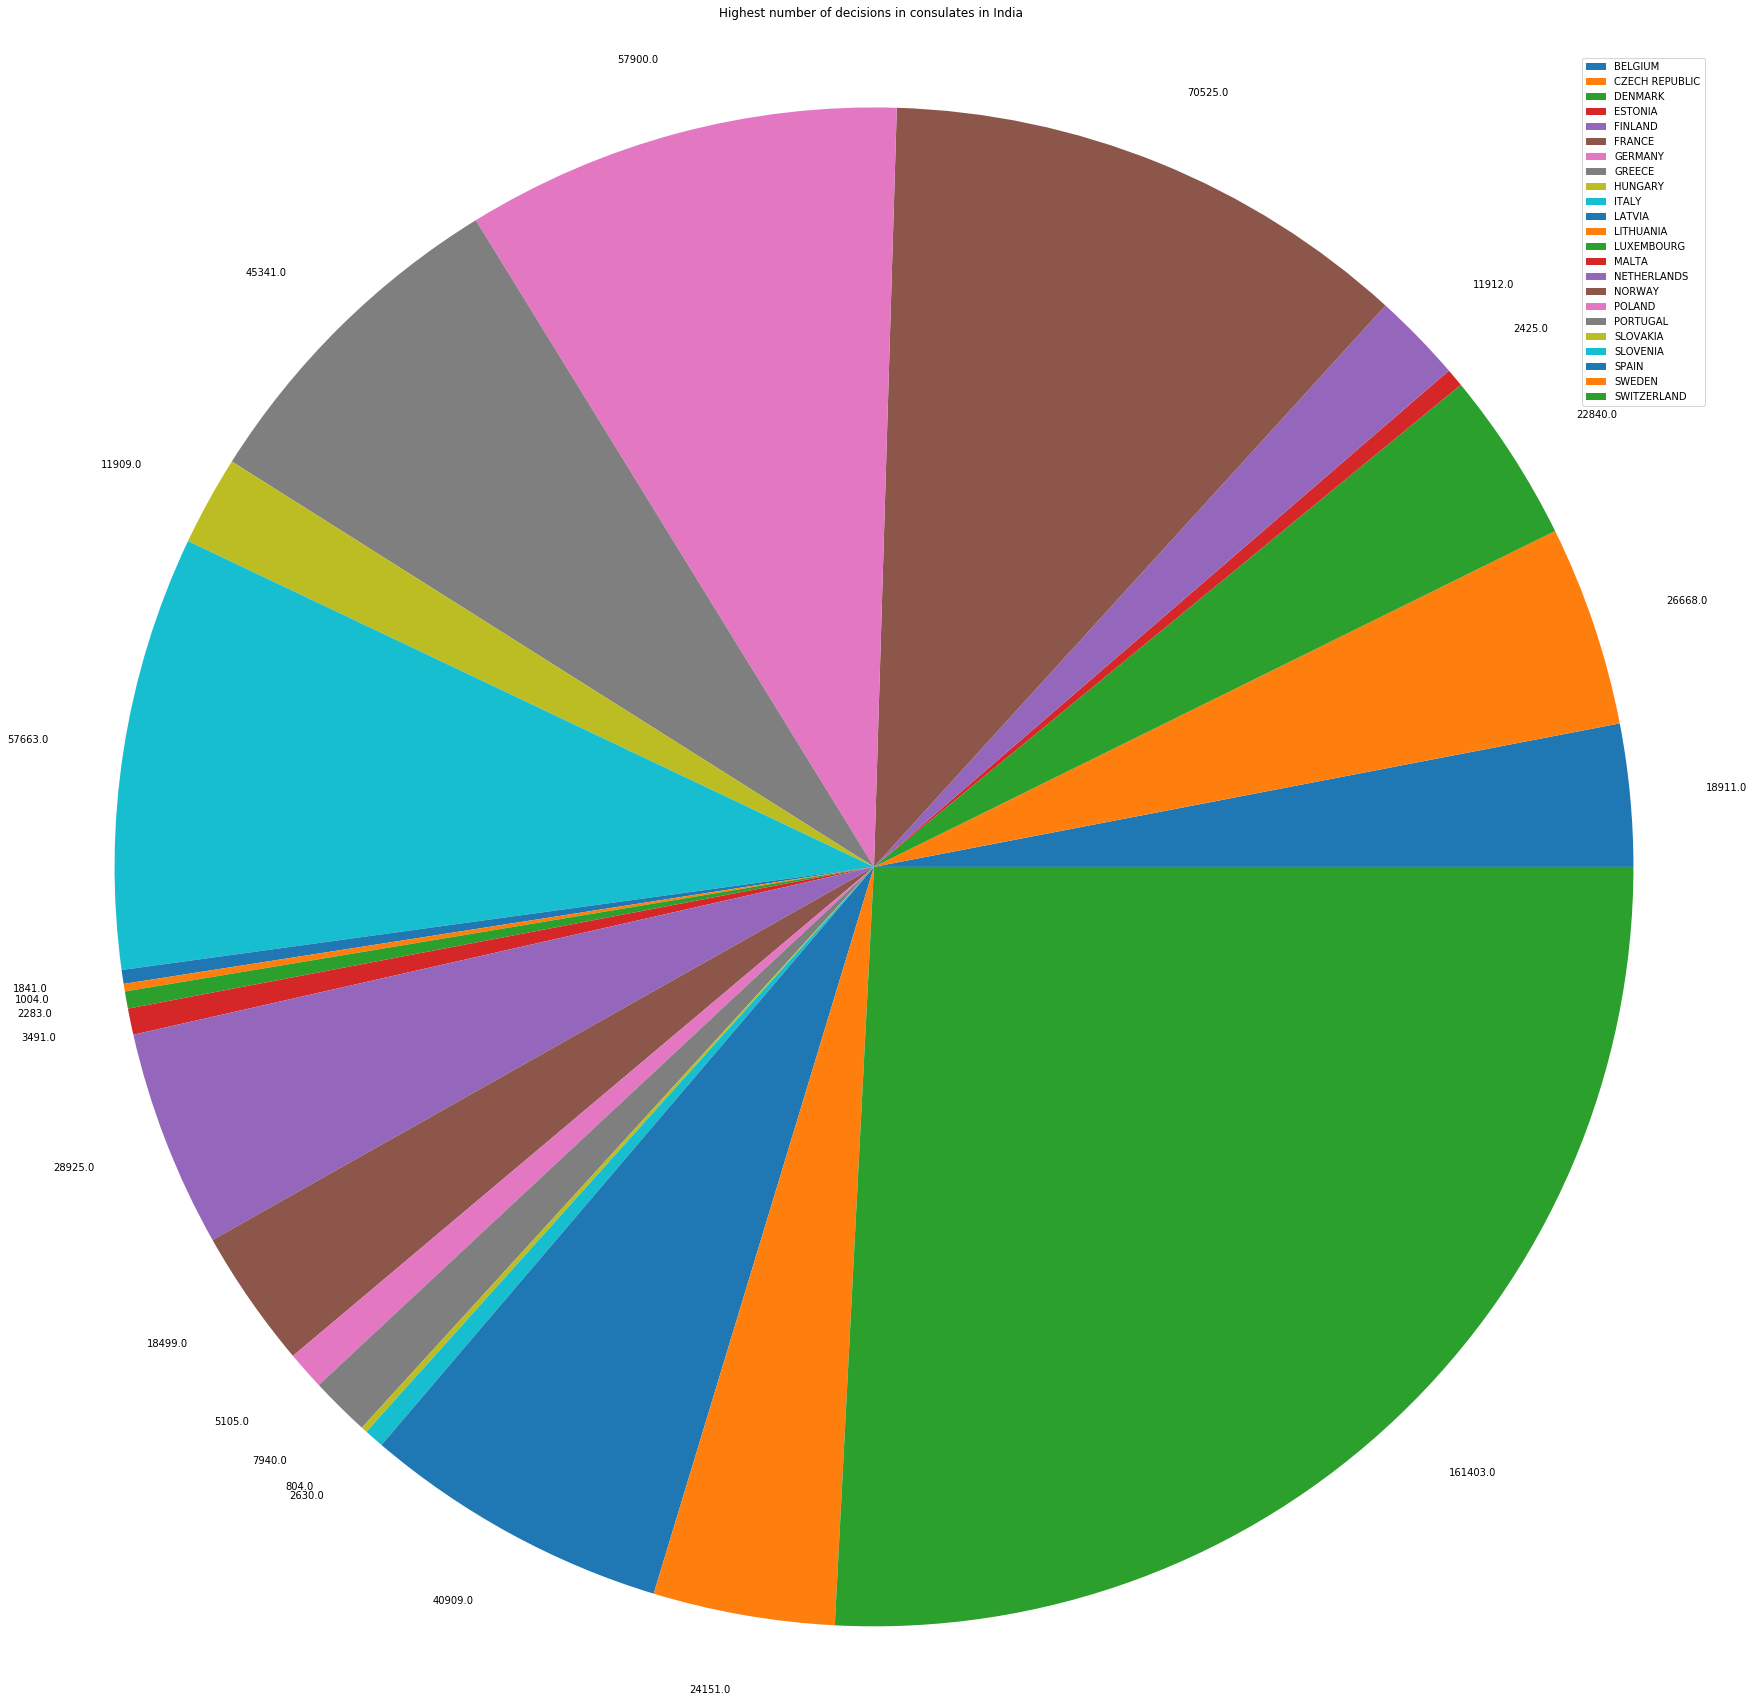

In [608]:
#Pie Chart
pie2=df[df["Country_where_consulate_is_located"]=="INDIA"].groupby(["Schengen_State"], sort=True)['decisions'].max() #.loc[df[df["Country_where_consulate_is_located"]=="EGYPT"]['decisions'].idxmax()]
p2=pie2.to_frame()
p2.plot(kind="pie", y="decisions", figsize=(30, 30), labels=p2["decisions"])
plt.title("Highest number of decisions in consulates in India \n\n")
plt.legend(labels=p2.index, loc='best')
plt.ylabel("")
plt.axis("equal")

In [609]:
df[df["Country_where_consulate_is_located"]=="INDIA"]

,Schengen_State,Country_where_consulate_is_located,Consulate,Uniform_visas_applied_for,Total__uniform_visas_issued_(including_MEV),Multiple_entry_uniform_visas_(MEVs)_issued,Share_of_MEVs_on_total_number_of_uniform_visas_issued,Total_LTVs_issued,Uniform_visas_not_issued,Not_issued_rate_for_uniform_visas,decisions,rejection_rate,Weighted_Score
93,BELGIUM,INDIA,MUMBAI,19162.0,18360.0,15892.0,86.6,0.0,551.0,2.9,18911.0,2.913648,0.840768
94,BELGIUM,INDIA,NEW DELHI,7117.0,6052.0,4029.0,66.6,0.0,888.0,12.5,6940.0,12.795389,0.580783
177,CZECH REPUBLIC,INDIA,NEW DELHI,26683.0,20449.0,2035.0,10.0,0.0,6219.0,23.3,26668.0,23.320084,0.076680
253,DENMARK,INDIA,NEW DELHI,23275.0,21890.0,18884.0,86.3,1.0,949.0,4.1,22840.0,4.154991,0.827142
298,ESTONIA,INDIA,NEW DELHI,2425.0,1524.0,984.0,64.6,3.0,898.0,37.0,2425.0,37.030928,0.406780
328,FINLAND,INDIA,NEW DELHI,11959.0,11398.0,7869.0,69.0,2.0,512.0,4.3,11912.0,4.298187,0.660343
441,FRANCE,INDIA,BANGALORE,45048.0,42308.0,4772.0,11.3,15.0,2362.0,5.2,44685.0,5.285890,0.107027
442,FRANCE,INDIA,KOLKATA,18810.0,18120.0,2286.0,12.6,0.0,617.0,3.3,18737.0,3.292950,0.121851
443,FRANCE,INDIA,MUMBAI,69603.0,60962.0,9912.0,16.3,0.0,8171.0,11.7,69133.0,11.819247,0.143735
444,FRANCE,INDIA,NEW DELHI,71222.0,59861.0,7273.0,12.1,1.0,10663.0,15.0,70525.0,15.119461,0.102705


In [610]:
## Testing consulates in India based on rejection rates
rejection_rate_india=df[df["Country_where_consulate_is_located"]=="INDIA"]["Uniform_visas_not_issued"].sum()/df[df["Country_where_consulate_is_located"]=="INDIA"]['decisions'].sum()
print("Mean rejection rate: ", rejection_rate_india)
for index, row in df[df["Country_where_consulate_is_located"]=="INDIA"].iterrows():
    print("\n")
    no_of_ones=row["Uniform_visas_not_issued"]
    no_of_zeroes=row["decisions"]-row["Uniform_visas_not_issued"]
    arr=np.zeros(int(row["decisions"]))
    for i in range(int(no_of_ones)):
        arr[i]=1
    tset, pval = ttest_1samp(arr, rejection_rate_india)
    print('p-value',pval)
    if pval < 0.025:    # alpha value is 0.025 or 2.5%
        print("We are rejecting null hypothesis for the consulate in", row["Consulate"], "of the state", row["Schengen_State"])
    else:
        print("We are accepting null hypothesis for the consulate in", row["Consulate"], "of the state", row["Schengen_State"])

Mean rejection rate:  0.09516950668161513


p-value 0.0
We are rejecting null hypothesis for the consulate in MUMBAI of the state BELGIUM


p-value 3.471387544303548e-16
We are rejecting null hypothesis for the consulate in NEW DELHI of the state BELGIUM


p-value 0.0
We are rejecting null hypothesis for the consulate in NEW DELHI of the state CZECH REPUBLIC


p-value 0.0
We are rejecting null hypothesis for the consulate in NEW DELHI of the state DENMARK


p-value 3.372868571810826e-150
We are rejecting null hypothesis for the consulate in NEW DELHI of the state ESTONIA


p-value 4.436454016529441e-168
We are rejecting null hypothesis for the consulate in NEW DELHI of the state FINLAND


p-value 0.0
We are rejecting null hypothesis for the consulate in BANGALORE of the state FRANCE


p-value 0.0
We are rejecting null hypothesis for the consulate in KOLKATA of the state FRANCE


p-value 2.986982800054281e-78
We are rejecting null hypothesis for the consulate in MUMBAI of the state FRAN

In [611]:
# Our results show that only the Polish consulate in Mumbai and the Portugese consulate in Goa pass the null hypothesis. 
# Upon deeper study it can be seen that these have rejection rates 0.0932 and 0.1042 respectively which are
# near enough to the overall rejection rate i.e. 0.095 for us to argue that the variations are due to chance.

In [612]:
## Testing consulates in India based on MEV share
MEV_india=df[df["Country_where_consulate_is_located"]=="INDIA"]["Multiple_entry_uniform_visas_(MEVs)_issued"].sum()/df[df["Country_where_consulate_is_located"]=="INDIA"]['Total__uniform_visas_issued_(including_MEV)'].sum()
print("Mean MEV share: ", MEV_india)
for index, row in df[df["Country_where_consulate_is_located"]=="INDIA"].iterrows():
    print("\n")
    no_of_ones=row["Multiple_entry_uniform_visas_(MEVs)_issued"]
    arr=np.zeros(int(row['Total__uniform_visas_issued_(including_MEV)']))
    for i in range(int(no_of_ones)):
        arr[i]=1
    tset, pval = ttest_1samp(arr, MEV_india)
    print('p-value',pval)
    if pval < 0.025:    # alpha value is 0.025 or 2.5%
        print("We are rejecting null hypothesis for the consulate in", row["Consulate"], "of the state", row["Schengen_State"])
    else:
        print("We are accepting null hypothesis for the consulate in", row["Consulate"], "of the state", row["Schengen_State"])

Mean MEV share:  0.5926509923586152


p-value 0.0
We are rejecting null hypothesis for the consulate in MUMBAI of the state BELGIUM


p-value 4.590149341243104e-33
We are rejecting null hypothesis for the consulate in NEW DELHI of the state BELGIUM


p-value 0.0
We are rejecting null hypothesis for the consulate in NEW DELHI of the state CZECH REPUBLIC


p-value 0.0
We are rejecting null hypothesis for the consulate in NEW DELHI of the state DENMARK


p-value 1.618637580992322e-05
We are rejecting null hypothesis for the consulate in NEW DELHI of the state ESTONIA


p-value 2.326751479584196e-110
We are rejecting null hypothesis for the consulate in NEW DELHI of the state FINLAND


p-value 0.0
We are rejecting null hypothesis for the consulate in BANGALORE of the state FRANCE


p-value 0.0
We are rejecting null hypothesis for the consulate in KOLKATA of the state FRANCE


p-value 0.0
We are rejecting null hypothesis for the consulate in MUMBAI of the state FRANCE


p-value 0.0
We are r

In [613]:
# Our results show that no consulate in India passes the null hypothesis. We can see why. None of the MEV shares of the 
# are near the mean MEV share of the whole population i.e 0.592.

In [614]:
## Testing consulates in India based on weighted score
#Since the weighted scores are normalized we can take the mean of the weighted score column as our statistic
#Since the weighted score depends on 1-rejection rate (or the acceptance rate) and the MEV share, we will fill our
#distribution arrays such that 1 represents number of MEVs 0 represents number of rejections
score_india=df[df["Country_where_consulate_is_located"]=="INDIA"]["Weighted_Score"].mean()
print("Mean Weighted Score: ", score_india)
for index, row in df[df["Country_where_consulate_is_located"]=="INDIA"].iterrows():
    print("\n")
    no_of_ones=row["Multiple_entry_uniform_visas_(MEVs)_issued"]
    arr=np.zeros(int(row["Multiple_entry_uniform_visas_(MEVs)_issued"])+int(row["Uniform_visas_not_issued"]))
    for i in range(int(no_of_ones)):
        arr[i]=1
    tset, pval = ttest_1samp(arr, score_india)
    print('p-value',pval)
    if pval < 0.025:    # alpha value is 0.025 or 2.5%
        print("We are rejecting null hypothesis for the consulate in", row["Consulate"], "of the state", row["Schengen_State"])
    else:
        print("We are accepting null hypothesis for the consulate in", row["Consulate"], "of the state", row["Schengen_State"])

Mean Weighted Score:  0.5203924447619525


p-value 0.0
We are rejecting null hypothesis for the consulate in MUMBAI of the state BELGIUM


p-value 0.0
We are rejecting null hypothesis for the consulate in NEW DELHI of the state BELGIUM


p-value 0.0
We are rejecting null hypothesis for the consulate in NEW DELHI of the state CZECH REPUBLIC


p-value 0.0
We are rejecting null hypothesis for the consulate in NEW DELHI of the state DENMARK


p-value 0.8311761463286357
We are accepting null hypothesis for the consulate in NEW DELHI of the state ESTONIA


p-value 0.0
We are rejecting null hypothesis for the consulate in NEW DELHI of the state FINLAND


p-value 2.7499546198796305e-149
We are rejecting null hypothesis for the consulate in BANGALORE of the state FRANCE


p-value 5.390490347944242e-226
We are rejecting null hypothesis for the consulate in KOLKATA of the state FRANCE


p-value 6.831649652293956e-14
We are rejecting null hypothesis for the consulate in MUMBAI of the state FRANCE


In [615]:
# Our results show that only the Estonian, Lithuanian and Maltese consulates based in New Delhi pass the null hypothesis when we passed 
# arrays based on the convention we decided on.

# Japan

(-1.100537700381731, 1.100025612185135, -1.100881795406085, 1.1152533646635847)

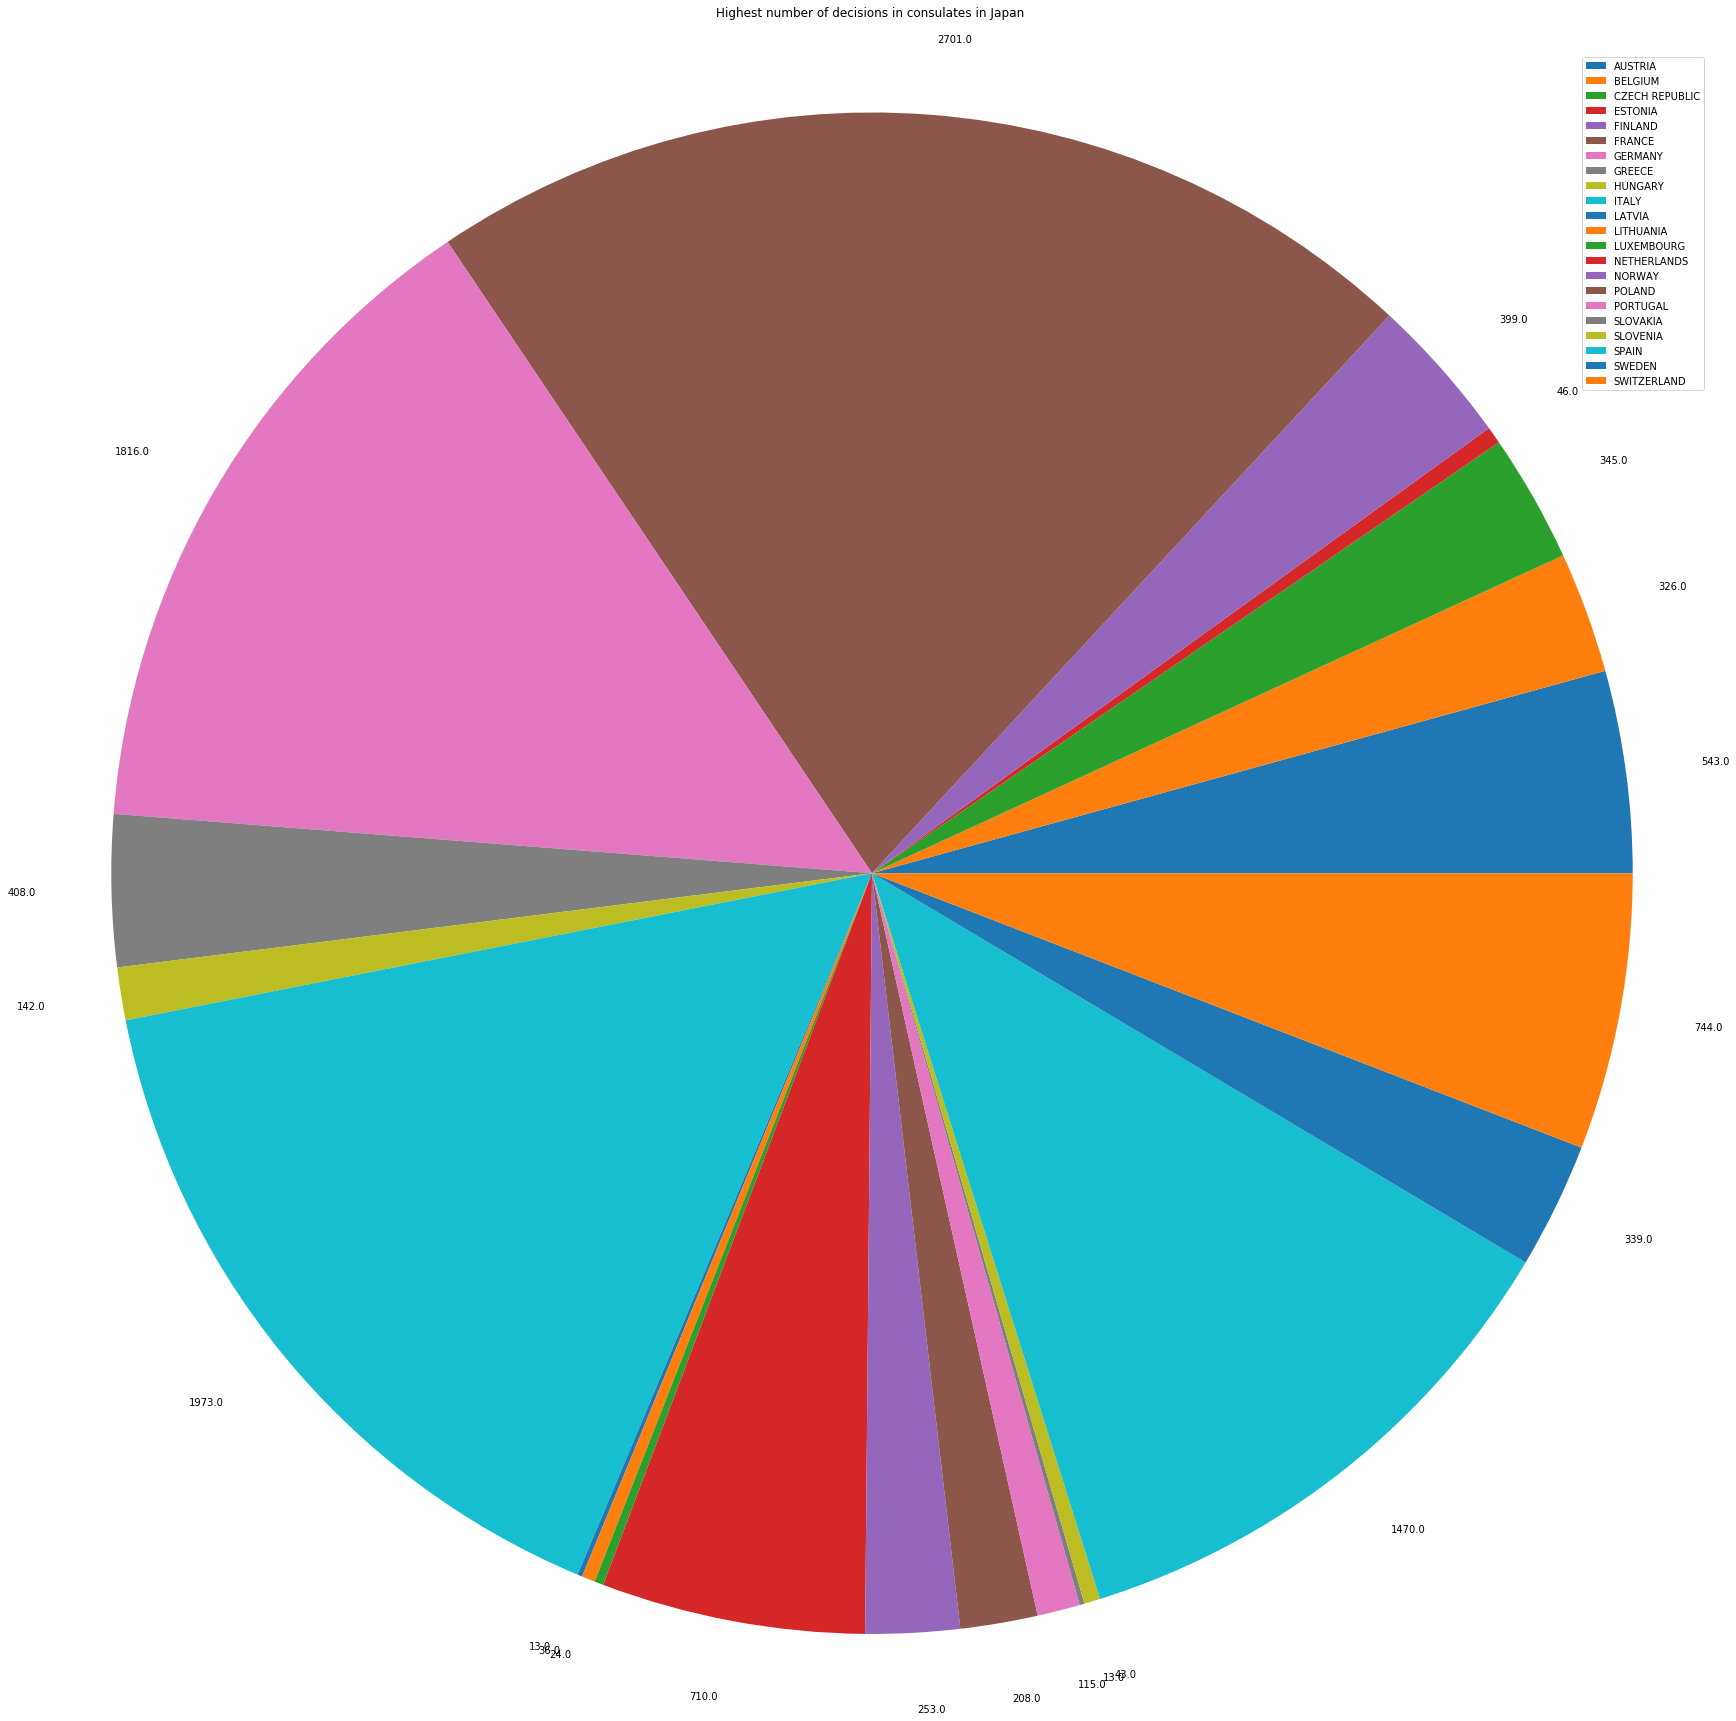

In [616]:
#Pie Chart
pie3=df[df["Country_where_consulate_is_located"]=="JAPAN"].groupby(["Schengen_State"], sort=True)['decisions'].max()
p3=pie3.to_frame()
p3.plot(kind="pie", y="decisions", figsize=(30, 30), labels=p3["decisions"])
plt.title("Highest number of decisions in consulates in Japan \n\n")
plt.legend(labels=p3.index, loc='best')
plt.ylabel("")
plt.axis("equal")

In [617]:
df[df["Country_where_consulate_is_located"]=="JAPAN"]

,Schengen_State,Country_where_consulate_is_located,Consulate,Uniform_visas_applied_for,Total__uniform_visas_issued_(including_MEV),Multiple_entry_uniform_visas_(MEVs)_issued,Share_of_MEVs_on_total_number_of_uniform_visas_issued,Total_LTVs_issued,Uniform_visas_not_issued,Not_issued_rate_for_uniform_visas,decisions,rejection_rate,Weighted_Score
25,AUSTRIA,JAPAN,TOKYO,543.0,543.0,38.0,7.0,0.0,0.0,0.0,543.0,0.000000,0.070000
102,BELGIUM,JAPAN,TOKYO,338.0,311.0,183.0,58.8,0.0,15.0,4.4,326.0,4.601227,0.560945
184,CZECH REPUBLIC,JAPAN,TOKYO,345.0,345.0,31.0,9.0,0.0,0.0,0.0,345.0,0.000000,0.090000
301,ESTONIA,JAPAN,TOKYO,46.0,45.0,16.0,35.6,0.0,1.0,2.2,46.0,2.173913,0.348261
334,FINLAND,JAPAN,TOKYO,401.0,373.0,61.0,16.4,14.0,12.0,3.0,399.0,3.007519,0.159068
455,FRANCE,JAPAN,TOKYO,2753.0,2592.0,682.0,26.3,2.0,107.0,3.9,2701.0,3.961496,0.252581
612,GERMANY,JAPAN,OSAKA,828.0,811.0,507.0,62.5,2.0,15.0,1.8,828.0,1.811594,0.613678
613,GERMANY,JAPAN,TOKYO,1816.0,1814.0,1810.0,99.8,2.0,0.0,0.0,1816.0,0.000000,0.998000
753,GREECE,JAPAN,TOKYO,408.0,398.0,171.0,43.0,0.0,10.0,2.5,408.0,2.450980,0.419461
834,HUNGARY,JAPAN,TOKYO,142.0,141.0,42.0,29.8,0.0,1.0,0.7,142.0,0.704225,0.295901


In [618]:
## Testing consulates in Japan based on rejection rates
rejection_rate_japan=df[df["Country_where_consulate_is_located"]=="JAPAN"]["Uniform_visas_not_issued"].sum()/df[df["Country_where_consulate_is_located"]=="JAPAN"]['decisions'].sum()
print("Mean rejection rate: ", rejection_rate_japan)
for index, row in df[df["Country_where_consulate_is_located"]=="JAPAN"].iterrows():
    print("\n")
    no_of_ones=row["Uniform_visas_not_issued"]
    no_of_zeroes=row["decisions"]-row["Uniform_visas_not_issued"]
    arr=np.zeros(int(row["decisions"]))
    for i in range(int(no_of_ones)):
        arr[i]=1
    tset, pval = ttest_1samp(arr, rejection_rate_japan)
    print('p-value',pval)
    if pval < 0.025:    # alpha value is 0.025 or 2.5%
        print("We are rejecting null hypothesis for the consulate in", row["Consulate"], "of the state", row["Schengen_State"])
    else:
        print("We are accepting null hypothesis for the consulate in", row["Consulate"], "of the state", row["Schengen_State"])

Mean rejection rate:  0.023807831710610475


p-value 0.0
We are rejecting null hypothesis for the consulate in TOKYO of the state AUSTRIA


p-value 0.05693377116600828
We are accepting null hypothesis for the consulate in TOKYO of the state BELGIUM


p-value 0.0
We are rejecting null hypothesis for the consulate in TOKYO of the state CZECH REPUBLIC


p-value 0.9246100322220447
We are accepting null hypothesis for the consulate in TOKYO of the state ESTONIA


p-value 0.4645565969800354
We are accepting null hypothesis for the consulate in TOKYO of the state FINLAND


p-value 2.6259278409635295e-05
We are rejecting null hypothesis for the consulate in TOKYO of the state FRANCE


p-value 0.22006129791896525
We are accepting null hypothesis for the consulate in OSAKA of the state GERMANY


p-value 0.0
We are rejecting null hypothesis for the consulate in TOKYO of the state GERMANY


p-value 0.9270709193444565
We are accepting null hypothesis for the consulate in TOKYO of the state GREECE



In [619]:
# Our results show that quite a lot of the consulates in Japan seem to accept the null hypothesis. These include the German
# consulate in Osaka and the following consulates in Tokyo: Swiss, Swedish, Slovenian. Portugese, Polish, Norwegian, 
# Luxembourgian, Lithuanian, Greek, Finnish, Estonian and Belgian. Upon deeper study it can be seen that all these have 
# rejection rates 0.495 and 0.473 respectively which are near enough to the overall population rejection rate i.e. 0.0238 
# and sample sizes suitable enough for us to argue that the variations are due to chance.

In [620]:
## Testing consulates in Japan based on MEV share
MEV_japan=df[df["Country_where_consulate_is_located"]=="JAPAN"]["Multiple_entry_uniform_visas_(MEVs)_issued"].sum()/df[df["Country_where_consulate_is_located"]=="JAPAN"]['Total__uniform_visas_issued_(including_MEV)'].sum()
print("Mean MEV share: ", MEV_japan)
for index, row in df[df["Country_where_consulate_is_located"]=="JAPAN"].iterrows():
    print("\n")
    no_of_ones=row["Multiple_entry_uniform_visas_(MEVs)_issued"]
    arr=np.zeros(int(row['Total__uniform_visas_issued_(including_MEV)']))
    for i in range(int(no_of_ones)):
        arr[i]=1
    tset, pval = ttest_1samp(arr, MEV_japan)
    print('p-value',pval)
    if pval < 0.025:    # alpha value is 0.025 or 2.5%
        print("We are rejecting null hypothesis for the consulate in", row["Consulate"], "of the state", row["Schengen_State"])
    else:
        print("We are accepting null hypothesis for the consulate in", row["Consulate"], "of the state", row["Schengen_State"])

Mean MEV share:  0.5589287017441437


p-value 1.3197302807139527e-183
We are rejecting null hypothesis for the consulate in TOKYO of the state AUSTRIA


p-value 0.29211654602716314
We are accepting null hypothesis for the consulate in TOKYO of the state BELGIUM


p-value 1.4566866088437313e-99
We are rejecting null hypothesis for the consulate in TOKYO of the state CZECH REPUBLIC


p-value 0.007208804083301116
We are rejecting null hypothesis for the consulate in TOKYO of the state ESTONIA


p-value 1.5413342977015239e-63
We are rejecting null hypothesis for the consulate in TOKYO of the state FINLAND


p-value 7.67760715634623e-212
We are rejecting null hypothesis for the consulate in TOKYO of the state FRANCE


p-value 0.0001069162913087948
We are rejecting null hypothesis for the consulate in OSAKA of the state GERMANY


p-value 0.0
We are rejecting null hypothesis for the consulate in TOKYO of the state GERMANY


p-value 3.1413902735291813e-07
We are rejecting null hypothesis for t

In [621]:
# Our results show that only the Slovenian and Belgian consulates based in Tokyo pass the null hypothesis. Upon deeper study
# it can be seen that these have MEV shares 0.561 and 0.588 respectively which are near enough to the overall MEV share 
# i.e. 0.559 for us to argue that the variations are due to chance. The rest are pretty far off from this value.

In [622]:
## Testing consulates in Japan based on weighted score
#Since the weighted scores are normalized we can take the mean of the weighted score column as our statistic
#Since the weighted score depends on 1-rejection rate (or the acceptance rate) and the MEV share, we will fill our
#distribution arrays such that 1 represents number of MEVs 0 represents number of rejections
score_japan=df[df["Country_where_consulate_is_located"]=="JAPAN"]["Weighted_Score"].mean()
print("Mean Weighted Score: ", score_japan)
for index, row in df[df["Country_where_consulate_is_located"]=="JAPAN"].iterrows():
    print("\n")
    no_of_ones=row["Multiple_entry_uniform_visas_(MEVs)_issued"]
    arr=np.zeros(int(row["Multiple_entry_uniform_visas_(MEVs)_issued"])+int(row["Uniform_visas_not_issued"]))
    for i in range(int(no_of_ones)):
        arr[i]=1
    tset, pval = ttest_1samp(arr, score_japan)
    print('p-value',pval)
    if pval < 0.025:    # alpha value is 0.025 or 2.5%
        print("We are rejecting null hypothesis for the consulate in", row["Consulate"], "of the state", row["Schengen_State"])
    else:
        print("We are accepting null hypothesis for the consulate in", row["Consulate"], "of the state", row["Schengen_State"])

Mean Weighted Score:  0.3897770912021618


p-value 0.0
We are rejecting null hypothesis for the consulate in TOKYO of the state AUSTRIA


p-value 1.88914984000447e-71
We are rejecting null hypothesis for the consulate in TOKYO of the state BELGIUM


p-value 0.0
We are rejecting null hypothesis for the consulate in TOKYO of the state CZECH REPUBLIC


p-value 6.70243971286227e-08
We are rejecting null hypothesis for the consulate in TOKYO of the state ESTONIA


p-value 1.2318728829800482e-15
We are rejecting null hypothesis for the consulate in TOKYO of the state FINLAND


p-value 1.2341808024162371e-185
We are rejecting null hypothesis for the consulate in TOKYO of the state FRANCE


p-value 2.4105392498403858e-293
We are rejecting null hypothesis for the consulate in OSAKA of the state GERMANY


p-value 0.0
We are rejecting null hypothesis for the consulate in TOKYO of the state GERMANY


p-value 2.0260943807233935e-77
We are rejecting null hypothesis for the consulate in TOKYO of the 

In [623]:
# Our results show that only the Portugese, Latvian and Luxembourgian consulates based in Tokyo pass the null hypothesis 
# when we passed arrays based on the convention we decided on.